In [1]:
import numpy as np
import string
import matplotlib.pyplot as plt
from imutils import face_utils
import os, cv2, dlib

In [2]:
path = '/home/isaac/Desktop/thermal/Isaac/1Sessionpilot'

In [3]:
detector = dlib.simple_object_detector(os.path.join("models/", "dlib_face_detector.svm"))
predictor = dlib.shape_predictor(os.path.join("models/", "dlib_landmark_predictor.dat"))

Logic for making region around ROI

Run on all images

Block: 0 level: 0
Extracted ROIs: (1297, 5, 5)


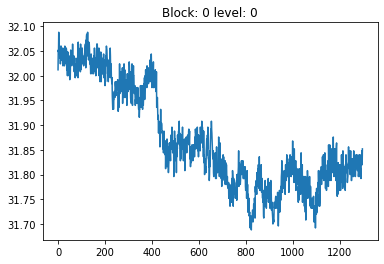

Block: 0 level: 1
Extracted ROIs: (1297, 5, 5)


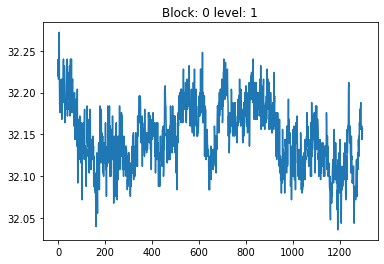

Block: 0 level: 2
Extracted ROIs: (1297, 5, 5)


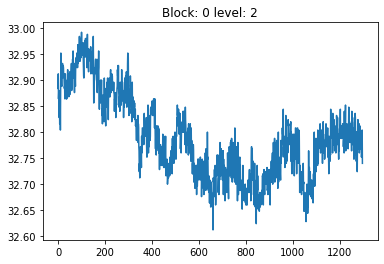

Block: 1 level: 0
Extracted ROIs: (1297, 5, 5)


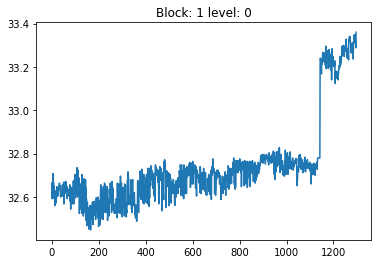

Block: 1 level: 1
Extracted ROIs: (1297, 5, 5)


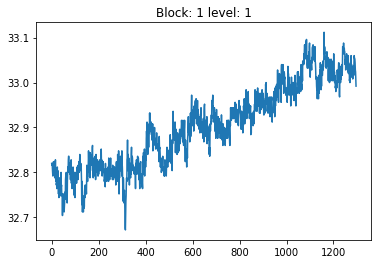

Block: 1 level: 2
Extracted ROIs: (1297, 5, 5)


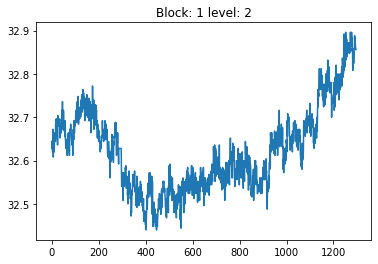

Block: 2 level: 0
Extracted ROIs: (1297, 5, 5)


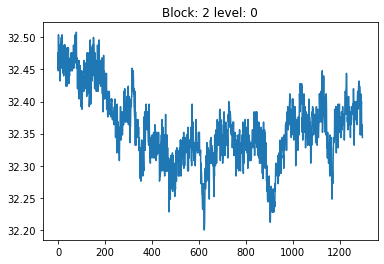

Block: 2 level: 1
Extracted ROIs: (1297, 5, 5)


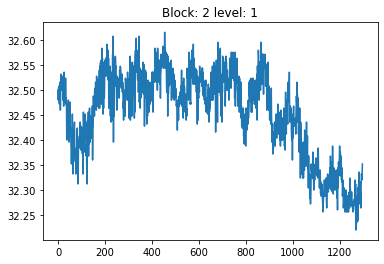

Block: 2 level: 2
Extracted ROIs: (1297, 5, 5)


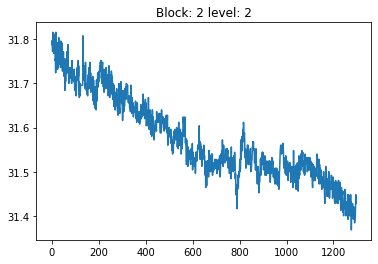

Block: 3 level: 0
Extracted ROIs: (1297, 5, 5)


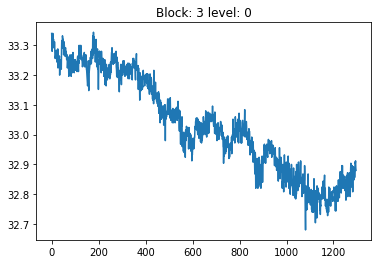

Block: 3 level: 1
Extracted ROIs: (1297, 5, 5)


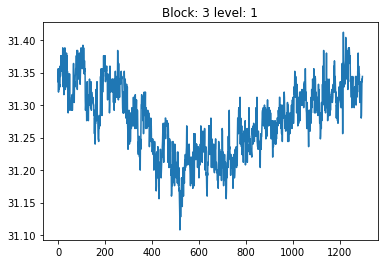

Block: 3 level: 2
Extracted ROIs: (1297, 5, 5)


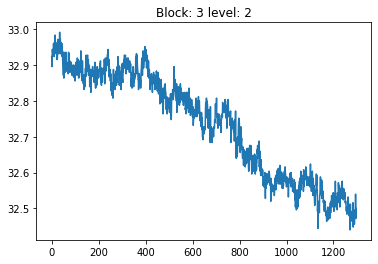

Block: 4 level: 0
Extracted ROIs: (1297, 5, 5)


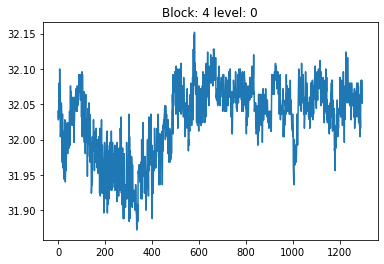

Block: 4 level: 1
Extracted ROIs: (1297, 5, 5)


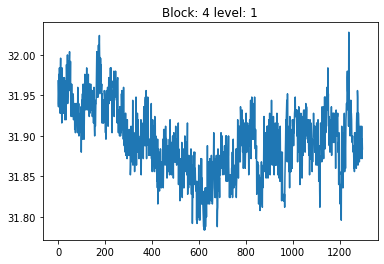

Block: 4 level: 2
Extracted ROIs: (1297, 5, 5)


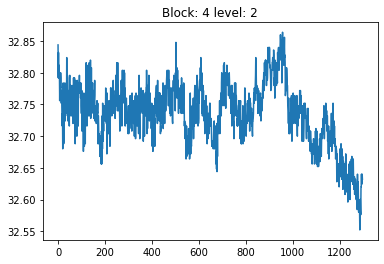

Block: 5 level: 0
Extracted ROIs: (1297, 5, 5)


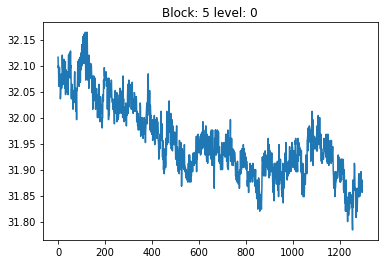

Block: 5 level: 1


<ipython-input-4-9ec390609bad>:24: RuntimeWarning: invalid value encountered in divide
  normalized_thermal_image = ((thermalImage - min_temp) / (max_temp - min_temp) * 255).astype(np.uint8)
<ipython-input-4-9ec390609bad>:24: RuntimeWarning: invalid value encountered in cast
  normalized_thermal_image = ((thermalImage - min_temp) / (max_temp - min_temp) * 255).astype(np.uint8)


dlib found no face: 1294
dlib found no face: 1295
dlib found no face: 1296
Extracted ROIs: (1297, 5, 5)


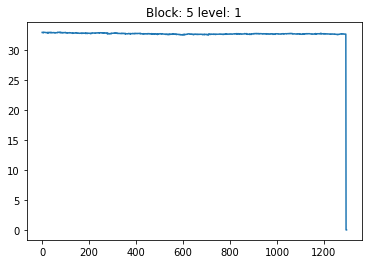

Block: 5 level: 2
Extracted ROIs: (1297, 5, 5)


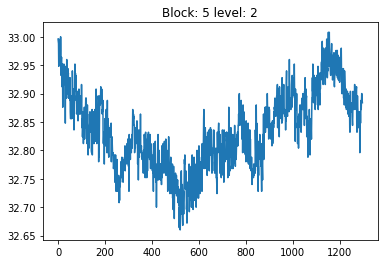

Block: 6 level: 0
Extracted ROIs: (1297, 5, 5)


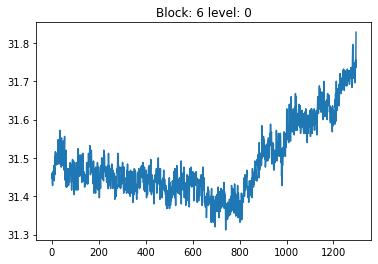

Block: 6 level: 1
Extracted ROIs: (1297, 5, 5)


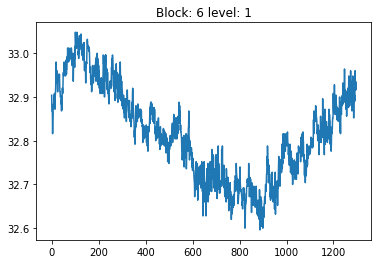

Block: 6 level: 2
Extracted ROIs: (1297, 5, 5)


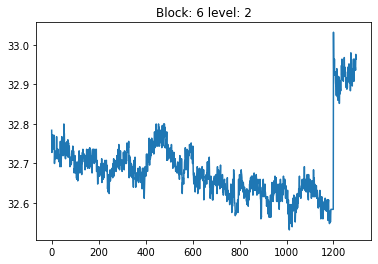

Block: 7 level: 0
Extracted ROIs: (1297, 5, 5)


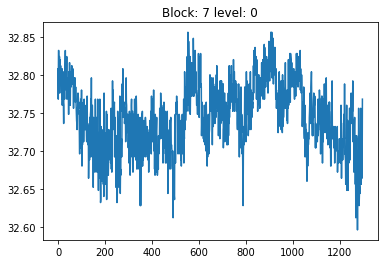

Block: 7 level: 1
Extracted ROIs: (1297, 5, 5)


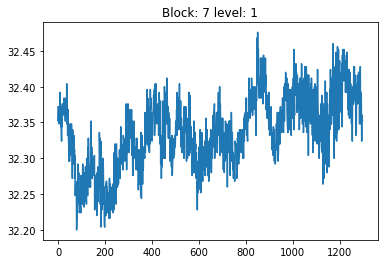

Block: 7 level: 2
Extracted ROIs: (1297, 5, 5)


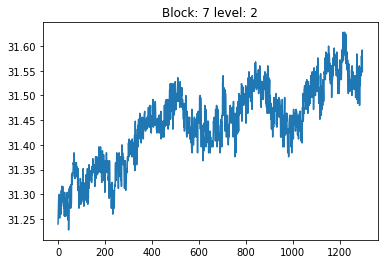

Block: 8 level: 0
Extracted ROIs: (1297, 5, 5)


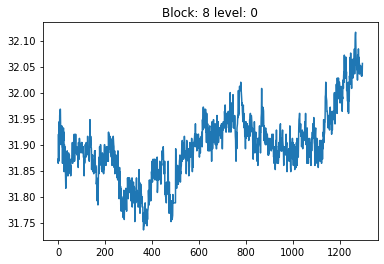

Block: 8 level: 1
Extracted ROIs: (1297, 5, 5)


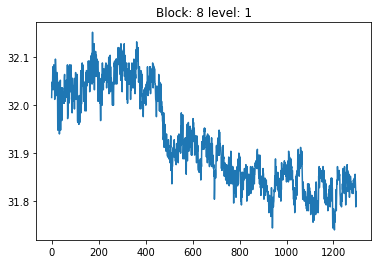

Block: 8 level: 2
dlib found no face: 1294
dlib found no face: 1295
dlib found no face: 1296
Extracted ROIs: (1297, 5, 5)


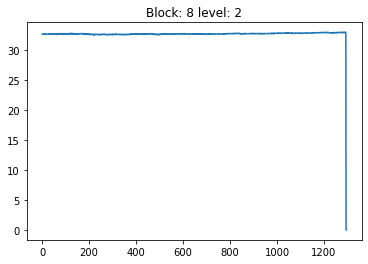

Block: 9 level: 0
Extracted ROIs: (1297, 5, 5)


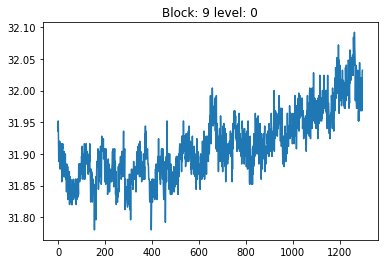

Block: 9 level: 1
Extracted ROIs: (1297, 5, 5)


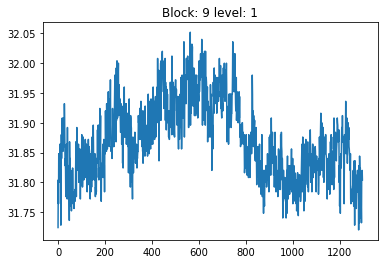

Block: 9 level: 2
Extracted ROIs: (1297, 5, 5)


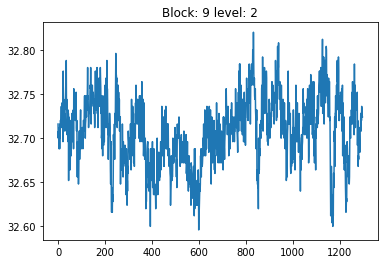

In [4]:
images = 1297
window_size = 5


lvl0 = []
lvl1 = []
lvl2 = []

for blk in range(10):
    for lvl in range(3):
        left_brow = np.zeros([images, 2])
        right_brow = np.zeros([images, 2])
        nose_tip = np.zeros([images, 2])
        title = 'Block: ' + str(blk) + ' level: ' + str(lvl)
        print(title)
        thermalImages = np.load(path + '/imagesBlock' + str(blk) + 'level' + str(lvl) + '.npy')/ 10 - 100
        thermalImages = thermalImages.reshape(-1, 288, 382)

        for currentImage in range(images):
            thermalImage = thermalImages[currentImage, :, :]
            min_temp = np.min(thermalImage)
            max_temp = np.max(thermalImage)

            normalized_thermal_image = ((thermalImage - min_temp) / (max_temp - min_temp) * 255).astype(np.uint8)       
            rects = detector(normalized_thermal_image, upsample_num_times=1)

            if rects:
                (x, y, w, h) = face_utils.rect_to_bb(rects[0])
                shape = predictor(normalized_thermal_image, rects[0])
                shape = face_utils.shape_to_np(shape)
                for i, (sx, sy) in enumerate(shape):
                    # print(i, sx, sy, type(sx))
                    if i in [21, 22, 30]:
                        cv2.circle(normalized_thermal_image, (sx, sy), 2, (0, 0, 255), -1)
                        if i == 21:
                            left_brow[currentImage, :] = np.array([sx, sy])
                        elif i == 22:
                            right_brow[currentImage, :] = np.array([sx, sy])
                        else:
                            nose_tip[currentImage, :] = np.array([sx, sy])
            else:
                print("dlib found no face:", currentImage)

        nose_rois = []
        for i,point in enumerate(nose_tip):
            if not np.all(point == 0):  # Skip if the point is [0, 0], indicating no face found
                roi_x = int(point[0]) - window_size // 2
                roi_y = int(point[1]) - window_size // 2
                roi = thermalImages[i, roi_y:roi_y + window_size, roi_x:roi_x + window_size]
            else:
                roi = np.zeros((window_size, window_size))  # Placeholder for no face
                
            nose_rois.append(roi)

        nose_rois = np.array(nose_rois)
        print("Extracted ROIs:", nose_rois.shape)

        timeseries = nose_rois[:, :, :].mean(axis = (1, 2))

        if lvl == 0:
            lvl0.append(timeseries)
        elif lvl == 1:
            lvl1.append(timeseries)
        else:
            lvl2.append(timeseries)

        plt.plot(timeseries)
        plt.title(title)
        plt.show()

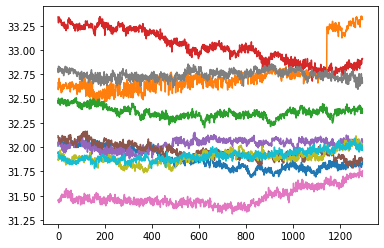

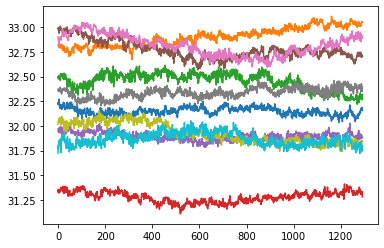

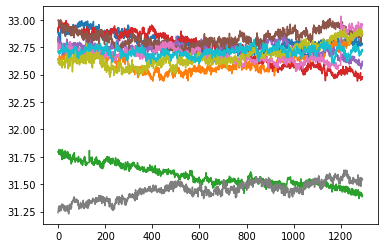

In [125]:
for signal in lvl0:
    
    plt.plot(signal[:-2])
plt.show()

for signal in lvl1:
    plt.plot(signal[:-5])
plt.show()

for signal in lvl2:
    plt.plot(signal[:-5])
plt.show()

In [6]:
# Calculate average signals

# Calculate average signals for the first 100 points
lvl0 = np.array(lvl0)
lvl1 = np.array(lvl1)
lvl2 = np.array(lvl2)


In [7]:
def removeThermalOutliers(data, threshold = 2):
    mean_values = np.mean(data, axis=1)
    std_values = np.std(data, axis=1)
    
    # Identify outliers using the z-score
    z_scores = np.abs((data - mean_values[:, np.newaxis]) / std_values[:, np.newaxis])
    outliers = z_scores > threshold
    
    modified_data = np.copy(data)

    for i in range(data.shape[0]):
        signal = data[i, :]
        signal_outliers = outliers[i, :]

        # Calculate the mean value of the signal excluding outliers
        mean_value_signal = np.mean(signal[~signal_outliers])

        # Replace outliers with the mean value
            
        modified_data[i, signal_outliers] = mean_value_signal

    return modified_data

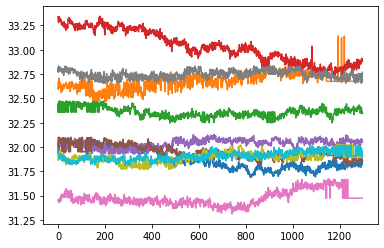

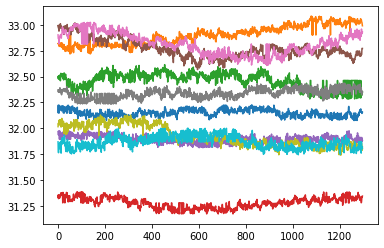

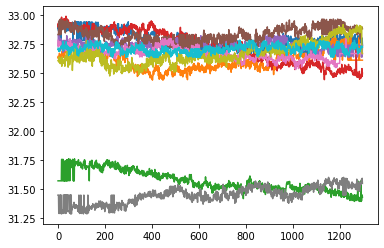

In [8]:
# plt.plot(lvl0.T)
# plt.show()


lvl0_outlier_removal = removeThermalOutliers(lvl0)
plt.plot(lvl0_outlier_removal.T)
plt.show()


lvl1_outlier_removal = removeThermalOutliers(lvl1)
plt.plot(lvl1_outlier_removal.T)
plt.show()



lvl2_outlier_removal = removeThermalOutliers(lvl2)
plt.plot(lvl2_outlier_removal.T)
plt.show()




In [18]:
baseline_mean = np.mean(np.concatenate([lvl0_outlier_removal[:, :100],
              lvl1_outlier_removal[:, :100],
              lvl2_outlier_removal[:, :100]]))

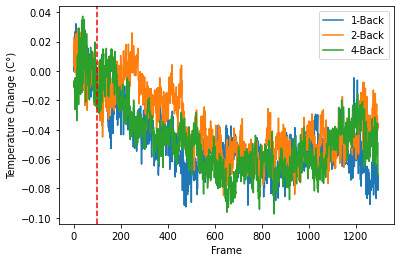

In [20]:
avg_lvl0_first_100 = np.mean(lvl0_outlier_removal[:, :100])
avg_lvl1_first_100 = np.mean(lvl1_outlier_removal[:, :100])
avg_lvl2_first_100 = np.mean(lvl2_outlier_removal[:, :100])


avg_lvl0 = np.mean(lvl0_outlier_removal, axis=0) - avg_lvl0_first_100
avg_lvl1 = np.mean(lvl1_outlier_removal, axis=0) - avg_lvl1_first_100
avg_lvl2 = np.mean(lvl2_outlier_removal, axis=0) - avg_lvl2_first_100

# Plot the average signals
plt.plot(avg_lvl0, label='1-Back')
plt.plot(avg_lvl1, label='2-Back')
plt.plot(avg_lvl2, label='4-Back')

# Add labels and legend
plt.xlabel('Frame')
plt.ylabel('Temperature Change (C°)')
plt.legend()
plt.axvline(x=100, color='r', linestyle='--')
# Show the plot

plt.show()


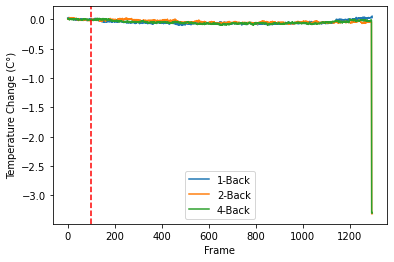

In [21]:
path

'/home/isaac/Desktop/thermal/Isaac/1Sessionpilot'

In [22]:
ls /home/isaac/Desktop/thermal/Isaac/1Sessionpilot

1_2023_Oct_13_1406_level0_block0.csv  imagesBlock5level0.npy
1_2023_Oct_13_1406_level0_block1.csv  imagesBlock5level1.npy
1_2023_Oct_13_1406_level0_block2.csv  imagesBlock5level2.npy
1_2023_Oct_13_1406_level0_block3.csv  imagesBlock6level0.npy
1_2023_Oct_13_1406_level0_block4.csv  imagesBlock6level1.npy
1_2023_Oct_13_1406_level0_block5.csv  imagesBlock6level2.npy
1_2023_Oct_13_1406_level0_block6.csv  imagesBlock7level0.npy
1_2023_Oct_13_1406_level0_block7.csv  imagesBlock7level1.npy
1_2023_Oct_13_1406_level0_block8.csv  imagesBlock7level2.npy
1_2023_Oct_13_1406_level0_block9.csv  imagesBlock8level0.npy
1_2023_Oct_13_1406_level1_block0.csv  imagesBlock8level1.npy
1_2023_Oct_13_1406_level1_block1.csv  imagesBlock8level2.npy
1_2023_Oct_13_1406_level1_block2.csv  imagesBlock9level0.npy
1_2023_Oct_13_1406_level1_block3.csv  imagesBlock9level1.npy
1_2023_Oct_13_1406_level1_block4.csv  imagesBlock9level2.npy
1_2023_Oct_13_1406_level1_block5.csv  timeStampBlock0level0.npy
1_2023_Oct_13_1406_le

In [30]:
blksLvlsMatrix = np.load(path + '/blksLvlsMatrix.npy')

In [29]:
data_outlier_removed = np.zeros([3, 10, 1297])
data_outlier_removed[0, :,:] = lvl0_outlier_removal
data_outlier_removed[1, :,:] = lvl1_outlier_removal
data_outlier_removed[2, :,:] = lvl2_outlier_removal

In [32]:
data_outlier_removed.shape

(3, 10, 1297)

In [41]:
data_outlier_removed.shape

(3, 10, 1297)

In [49]:
blksLvlsMatrix

array([[2, 1],
       [1, 6],
       [0, 7],
       [0, 1],
       [0, 3],
       [2, 8],
       [1, 5],
       [1, 1],
       [2, 5],
       [2, 0],
       [2, 4],
       [2, 9],
       [2, 6],
       [2, 3],
       [0, 2],
       [1, 7],
       [1, 2],
       [1, 0],
       [0, 4],
       [0, 5],
       [0, 8],
       [0, 0],
       [0, 9],
       [1, 4],
       [1, 8],
       [2, 2],
       [1, 3],
       [2, 7],
       [0, 6],
       [1, 9]])

In [250]:
levels = [lvlBlks[0] for lvlBlks in blksLvlsMatrix]
blocks = [lvlBlks[1] for lvlBlks in blksLvlsMatrix]

In [254]:
timeSortedData = data_outlier_removed[levels, blocks, :]
timeSortedDataDetrended = scipy.signal.detrend(timeSortedData.reshape(-1))

In [255]:
import scipy

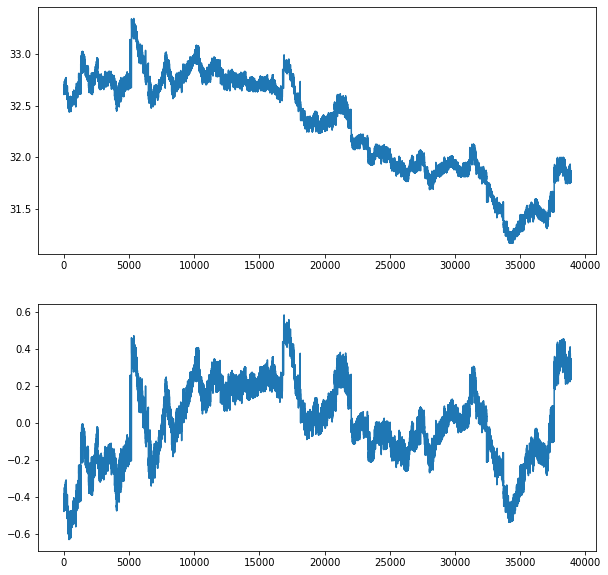

In [261]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(timeSortedData.reshape(-1))

plt.subplot(2, 1, 2)
plt.plot(timeSortedDataDetrended)
plt.show()

In [201]:
np.save("timeSortedNoseSession1Pilot.npy", timeSortedDataDetrended)

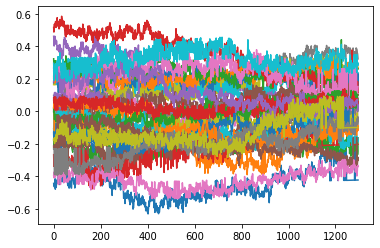

In [280]:
timeSortedDataDetrended = timeSortedDataDetrended.reshape(30, -1)
plt.plot(timeSortedDataDetrended.T)
plt.show()

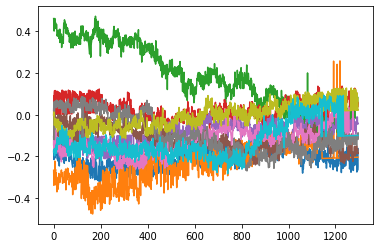

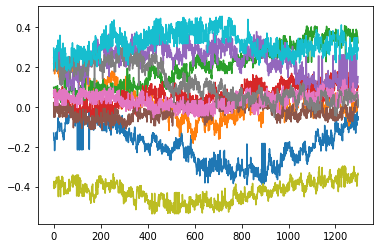

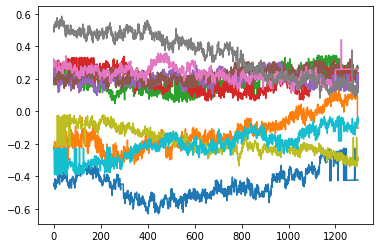

In [263]:
plt.plot(timeSortedDataDetrended[[indx for indx, blksLvl in enumerate(blksLvlsMatrix) 
                        if blksLvl[0] == 0] ,].T )
plt.show()

plt.plot(timeSortedDataDetrended[[indx for indx, blksLvl in enumerate(blksLvlsMatrix) 
                        if blksLvl[0] == 1] ,].T )
plt.show()


plt.plot(timeSortedDataDetrended[[indx for indx, blksLvl in enumerate(blksLvlsMatrix) 
                        if blksLvl[0] == 2] ,].T )
plt.show()

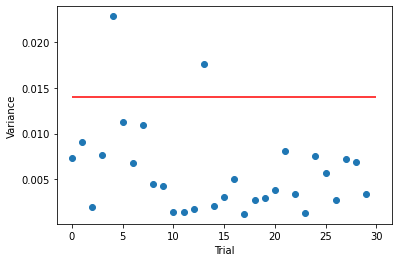

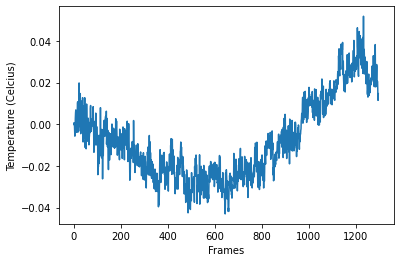

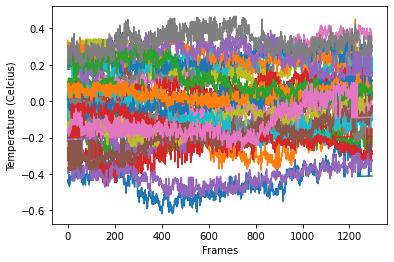

In [264]:
nbackTrialVar = np.var(timeSortedDataDetrended, axis = 1)
stdNback = np.std(nbackTrialVar)
medianNback = np.median(nbackTrialVar)
trialOutlierNback = np.where(nbackTrialVar > medianNback + 2 * stdNback)[0]

plt.scatter(np.linspace(0, 29, 30), nbackTrialVar)
plt.hlines(medianNback + 2 * stdNback, 0, 30, colors="red")
plt.ylabel('Variance')
plt.xlabel('Trial')
plt.show()

maskNback = ~np.isin(np.arange(timeSortedDataDetrended.shape[0]), trialOutlierNback)
plt.plot(np.mean(timeSortedDataDetrended[maskNback], axis = 0) - np.mean(timeSortedDataDetrended[maskNback,:100]))
plt.ylabel('Temperature (Celcius)')
plt.xlabel('Frames')
plt.show()

plt.plot(timeSortedDataDetrended[maskNback].T - np.mean(timeSortedDataDetrended[maskNback,:100]))
plt.ylabel('Temperature (Celcius)')
plt.xlabel('Frames')
plt.show()


In [265]:
levels = [lvlBlks[0] for lvlBlks in blksLvlsMatrix[maskNback]]
blocks = [lvlBlks[1] for lvlBlks in blksLvlsMatrix[maskNback]]

In [266]:
blksLvlsMatrix[maskNback]

array([[2, 1],
       [1, 6],
       [0, 7],
       [0, 1],
       [2, 8],
       [1, 5],
       [1, 1],
       [2, 5],
       [2, 0],
       [2, 4],
       [2, 9],
       [2, 6],
       [0, 2],
       [1, 7],
       [1, 2],
       [1, 0],
       [0, 4],
       [0, 5],
       [0, 8],
       [0, 0],
       [0, 9],
       [1, 4],
       [1, 8],
       [2, 2],
       [1, 3],
       [2, 7],
       [0, 6],
       [1, 9]])

In [267]:
nback1Trials = timeSortedDataDetrended[[indx for indx, blksLvl in enumerate(blksLvlsMatrix) 
                        if blksLvl[0] == 0] , :]
nback2Trials = timeSortedDataDetrended[[indx for indx, blksLvl in enumerate(blksLvlsMatrix) 
                        if blksLvl[0] == 1] , :]
nback4Trials = timeSortedDataDetrended[[indx for indx, blksLvl in enumerate(blksLvlsMatrix) 
                        if blksLvl[0] == 2] , :]

nback1TrialVar = np.var(nback1Trials, axis=1)
nback2TrialVar = np.var(nback2Trials, axis=1)
nback4TrialVar = np.var(nback4Trials, axis=1)

stdNback1 = np.std(nback1TrialVar)
medianNback1 = np.median(np.var(nback1Trials, axis=1))

stdNback2 = np.std(nback2TrialVar)
medianNback2 = np.median(np.var(nback2Trials, axis=1))

stdNback4 = np.std(nback4TrialVar)
medianNback4 = np.median(np.var(nback4Trials, axis=1))



In [268]:
trialOutlierNback1 = np.where(nback1TrialVar > medianNback1 + 2 * stdNback1)[0]
trialOutlierNback2 = np.where(nback2TrialVar > medianNback2 + 2 * stdNback2)[0]
trialOutlierNback4 = np.where(nback4TrialVar > medianNback4 + 2 * stdNback4)[0]


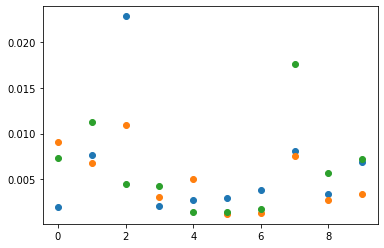

In [269]:
plt.scatter(np.linspace(0, 9, 10), nback1TrialVar)
plt.scatter(np.linspace(0, 9, 10), nback2TrialVar)
plt.scatter(np.linspace(0, 9, 10), nback4TrialVar)
plt.show()


In [270]:
nback1Trials.shape

(10, 1297)

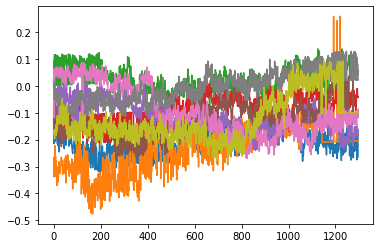

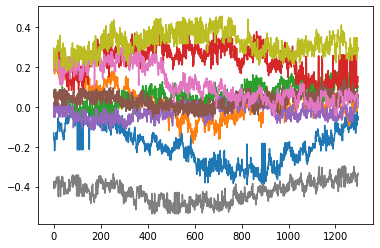

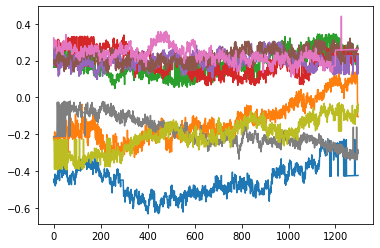

In [271]:
maskNback1 = ~np.isin(np.arange(nback1Trials.shape[0]), trialOutlierNback1)
plt.plot(nback1Trials[maskNback1].T )
plt.show()

maskNback2 = ~np.isin(np.arange(nback2Trials.shape[0]), trialOutlierNback2)
plt.plot(nback2Trials[maskNback2].T )
plt.show()

maskNback4 = ~np.isin(np.arange(nback4Trials.shape[0]), trialOutlierNback4)
plt.plot(nback4Trials[maskNback4].T )
plt.show()

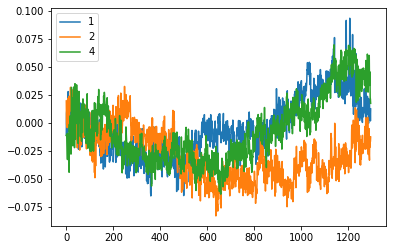

In [194]:
detrendNback1 = np.mean(nback1Trials[maskNback1], axis = 0)
detrendNback2 = np.mean(nback2Trials[maskNback2], axis = 0)
detrendNback4 = np.mean(nback4Trials[maskNback4], axis = 0)

plt.plot(detrendNback1 - np.mean(detrendNback1[:100]), label = "1")
plt.plot(detrendNback2 - np.mean(detrendNback2[:100]), label = "2")
plt.plot(detrendNback4 - np.mean(detrendNback4[:100]), label = "4")
plt.legend()
plt.show()

In [192]:
print(np.mean(detrendNback1[:100]),
np.mean(detrendNback2[:100]),
np.mean(detrendNback4[:100]))

-0.06441241478226875 0.030782293789567063 0.014320251110379753


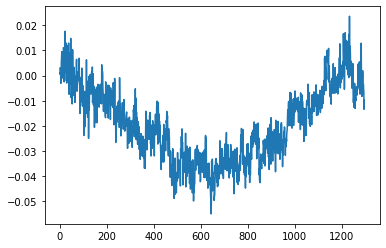

In [138]:

plt.plot(np.mean(np.concatenate(nback1Trials[mask],
                                nback1Trials[mask],
                                nback1Trials[mask], axis= 0) - np.mean(timeSortedDataDetrended[:,:100]), label = "1")

plt.show()

In [130]:
timeSortedDataDetrended.shape

(30, 1297)